In [1]:
print("Importing libraries...")
print("----------------------")
import pandas as pd

print("Reading CSV files...")
print("--------------------")

data = pd.read_csv("./haddock.csv", delimiter=";")

print("Brief of the data")
print("-----------------")
print("\n")
print(data.head())

Importing libraries...
----------------------
Reading CSV files...
--------------------
Brief of the data
-----------------


   had_score  had_sd  rmsd  rmsd_sd   vdv  vdv_sd   elec  elec_sd  desolv  \
0      -93.6     4.5   4.0      0.1 -61.3    10.1 -246.1     53.5     2.6   
1      -91.2    10.7   3.5      2.7 -33.4    11.6 -360.5     69.8     0.5   
2     -109.4    12.1   2.6      1.6 -77.9     6.1 -249.2     46.5    11.4   
3      -97.9     4.9   5.7      0.4 -62.6     8.4 -268.3     73.8     3.3   
4      -92.0    18.9   5.5      3.2 -41.3     4.0 -306.6    100.0     1.8   

   desolv_sd  rest_viol  rest_viol_sd  bur_surf_area  bur_surf_area_sd  \
0        1.3      143.4         41.63         1730.3              45.0   
1        7.0      137.6         42.33         1621.5             138.6   
2        7.4       69.1         10.69         2297.0             191.9   
3        2.2      150.3         36.04         1689.3              47.9   
4        3.2       88.5         30.57    

In [2]:
wt_min_had = data["had_score"][0:5].min()
pt_min_had = data["had_score"][5:10].min()
ps_min_had = data["had_score"][10:15].min()
oka_min_had = data["had_score"][15:20].min()

print(wt_min_had)
print(pt_min_had)
print(ps_min_had)
print(oka_min_had)

wt_min_had = data["had_score"][0:5].min()
pt_min_had = data["had_score"][5:10].min()
ps_min_had = data["had_score"][10:15].min()
oka_min_had = data["had_score"][15:20].min()

-109.4
-165.6
-175.6
-72.9


In [3]:
# Selecting all of the columns according to the lowest haddock score
wt_best = data[data["had_score"] == wt_min_had]
pt_best = data[data["had_score"] == pt_min_had]
ps_best = data[data["had_score"] == ps_min_had]
oka_best = data[data["had_score"] == oka_min_had]

# combining the best according to HADDOCK score
best_df = pd.concat([wt_best, pt_best, ps_best, oka_best], axis=0)
best_df.index = ["Wild type", "Phospho threonine","Phospho serine","Okadaic acid"]
print(best_df)

                   had_score  had_sd  rmsd  rmsd_sd   vdv  vdv_sd   elec  \
Wild type             -109.4    12.1   2.6      1.6 -77.9     6.1 -249.2   
Phospho threonine     -165.6    18.1   3.3      0.3 -26.8    12.4 -793.3   
Phospho serine        -175.6    14.2   1.6      1.6  -7.0    13.8 -950.0   
Okadaic acid           -72.9    10.9   0.7      0.1 -34.4    11.3 -340.5   

                   elec_sd  desolv  desolv_sd  rest_viol  rest_viol_sd  \
Wild type             46.5    11.4        7.4       69.1         10.69   
Phospho threonine     79.3     8.3        3.6      114.6         50.32   
Phospho serine        99.3    12.0        1.9       93.4         49.44   
Okadaic acid          39.6   -14.8        1.4      104.6         21.86   

                   bur_surf_area  bur_surf_area_sd  z_score  
Wild type                 2297.0             191.9     -2.0  
Phospho threonine         1993.9             159.2     -0.6  
Phospho serine            1725.6             104.9     -0.5  


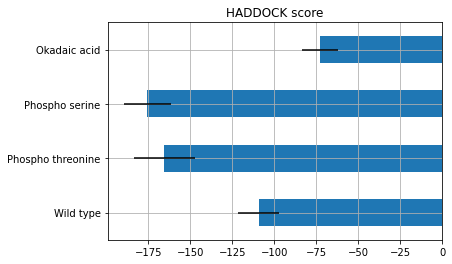

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Comparing the HADDOCK scores
best_df.plot(kind="barh", title="HADDOCK score", y="had_score",xerr="had_sd", grid=True, sharex=True, legend=None)
plt.savefig("haddock.tiff",transparent=False, dpi=300, bbox_inches="tight")
plt.show()

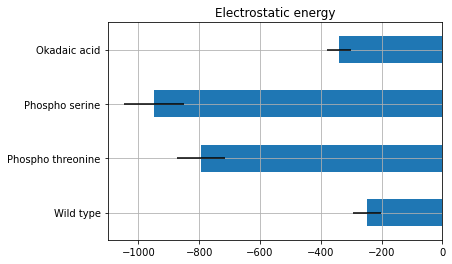

In [5]:
# Investigating the electrostatic energies
best_df.plot(kind="barh", title="Electrostatic energy", y="elec",xerr="elec_sd", grid=True, sharex=True, legend=None)
plt.savefig("elec.tiff",transparent=False, dpi=300, bbox_inches="tight")
plt.show()

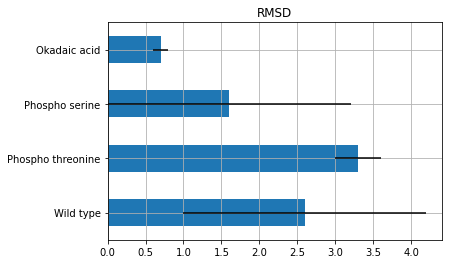

In [6]:
# RMSD
best_df.plot(kind="barh", title="RMSD", y="rmsd",xerr="rmsd_sd", grid=True, sharex=True, legend=None)
plt.savefig("rmsd.tiff",transparent=False, dpi=300, bbox_inches="tight")
plt.show()

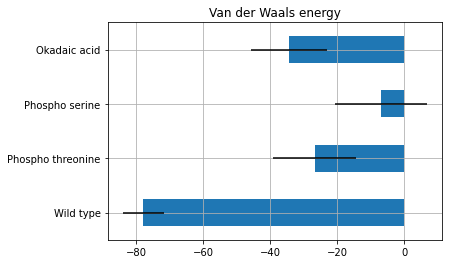

<Figure size 576x576 with 0 Axes>

In [7]:
best_df.plot(kind="barh", title="Van der Waals energy", y="vdv",xerr="vdv_sd", grid=True, sharex=True, legend=None)
plt.figure(figsize=(8, 8))
plt.show()

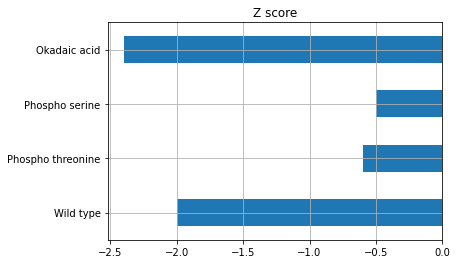

In [8]:
# Z score
best_df.plot(kind="barh", title="Z score", y="z_score", grid=True, sharex=True, legend=None)
plt.savefig("z_score.tiff",transparent=False, dpi=300, bbox_inches="tight")
plt.show()